In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [3]:
for c in json.columns:
    print(c)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Diamond Princess
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malaysia
Maldives
Malta
Mauritania
Mauritius
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Namibia
Nepal
Netherlands
New Zealand
Nicara

      date  confirmed  deaths  recovered
 2020-4-11       2518      35       1135
new  confirmed
      45.0


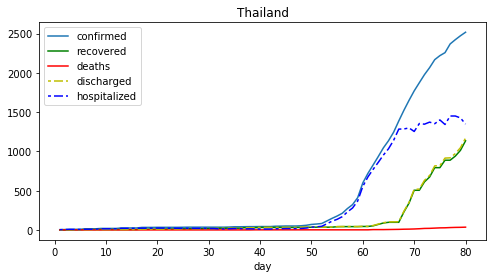

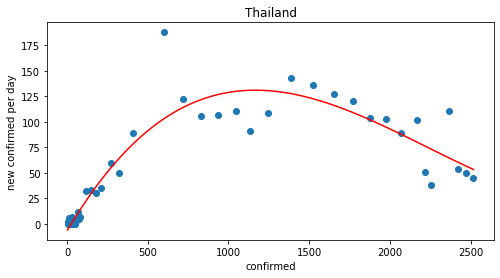

discharged:  1170
deaths:  35
%:  2.9914529914529915


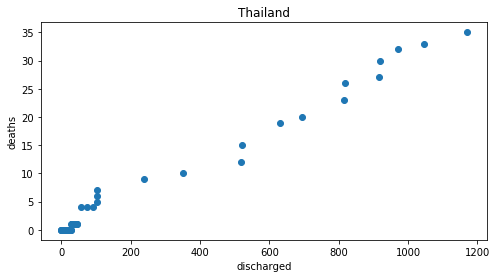

      date  confirmed  deaths  recovered
 2020-4-11       3842     327        286
new  confirmed
     330.0


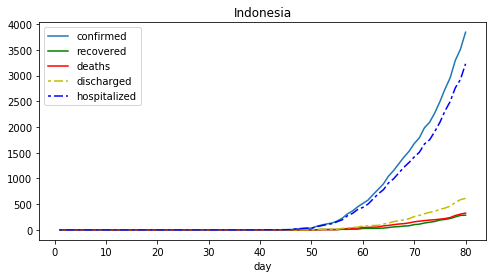

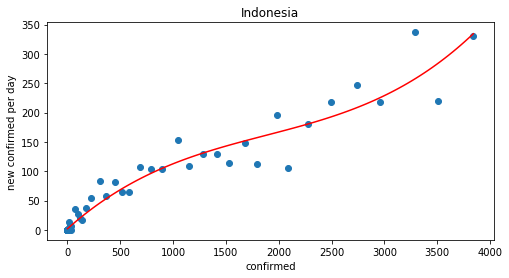

discharged:  613
deaths:  327
%:  53.344208809135395


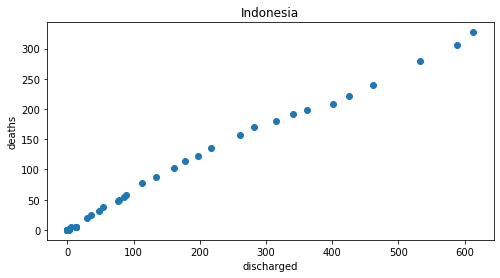

      date  confirmed  deaths  recovered
 2020-4-11       2299       8        528
new  confirmed
     191.0


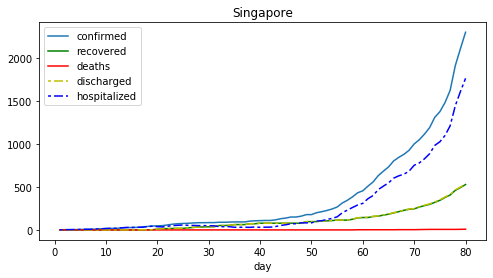

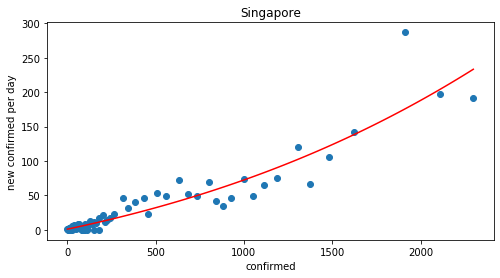

discharged:  536
deaths:  8
%:  1.4925373134328357


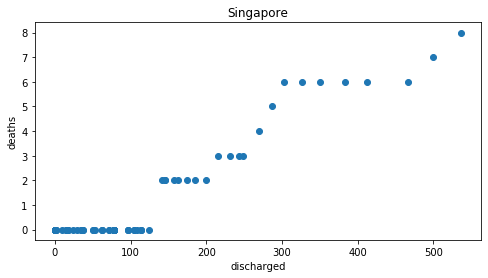

      date  confirmed  deaths  recovered
 2020-4-11     526396   20463      31270
new  confirmed
   29861.0


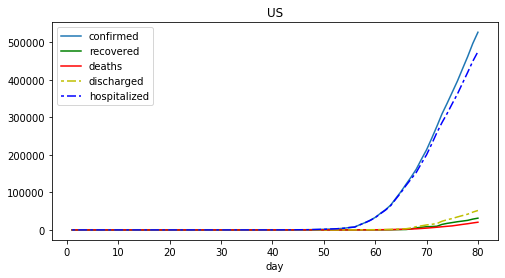

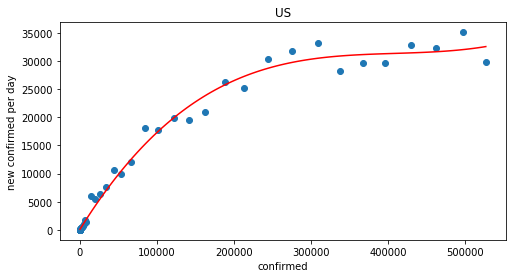

discharged:  51733
deaths:  20463
%:  39.55502290607543


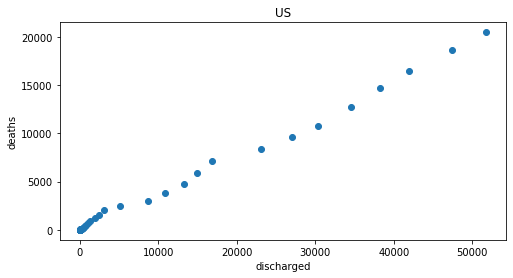

      date  confirmed  deaths  recovered
 2020-4-11      83014    3343      77877
new  confirmed
      73.0


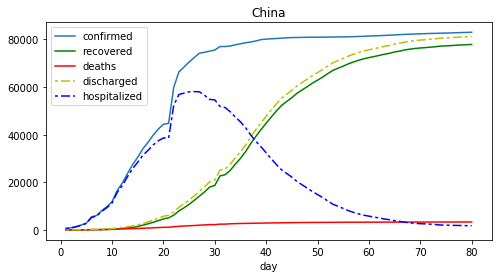

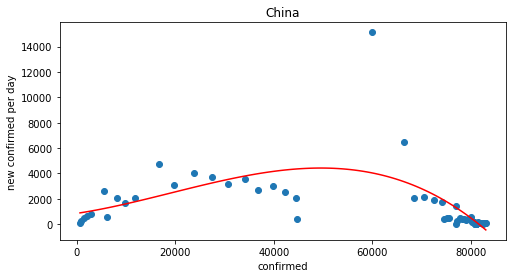

discharged:  81220
deaths:  3343
%:  4.115981285397686


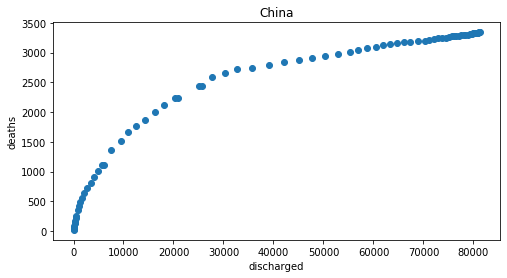

      date  confirmed  deaths  recovered
 2020-4-11      10480     211       7243
new  confirmed
      30.0


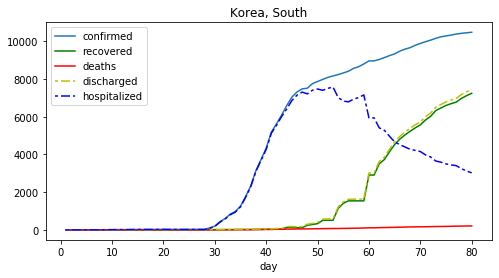

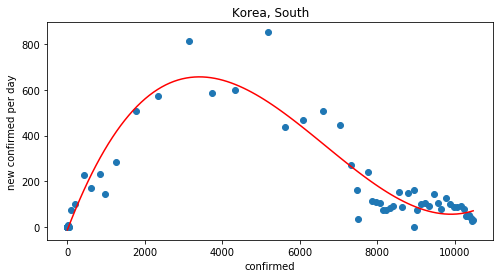

discharged:  7454
deaths:  211
%:  2.8306949288972363


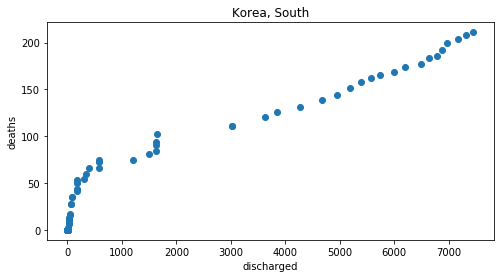

      date  confirmed  deaths  recovered
 2020-4-11     152271   19468      32534
new  confirmed
    4694.0


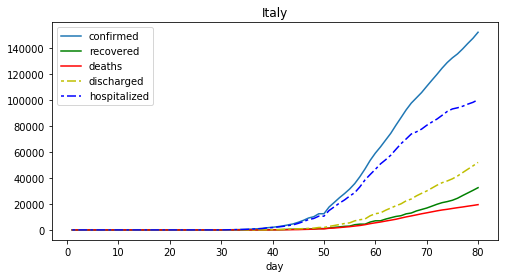

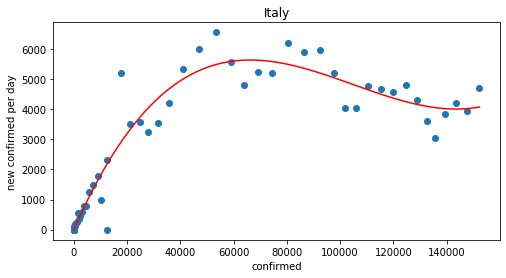

discharged:  52002
deaths:  19468
%:  37.437021653013346


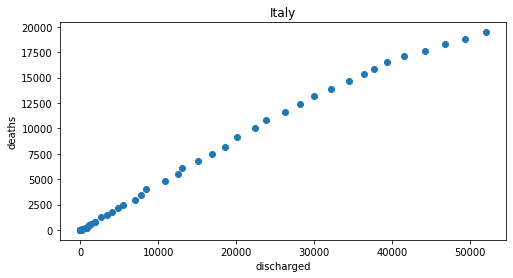

      date  confirmed  deaths  recovered
 2020-4-11     163027   16606      59109
new  confirmed
    4754.0


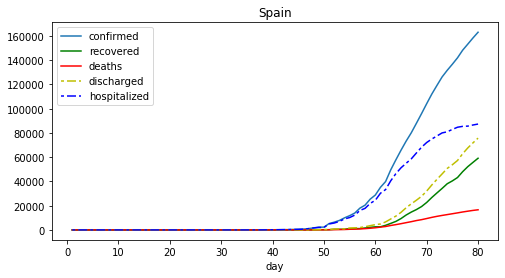

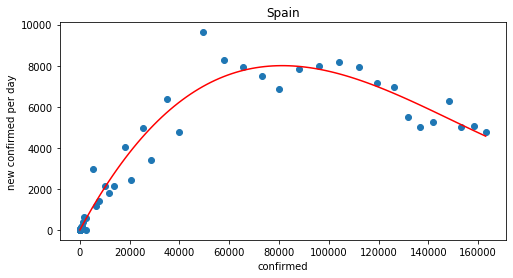

discharged:  75715
deaths:  16606
%:  21.93224592220828


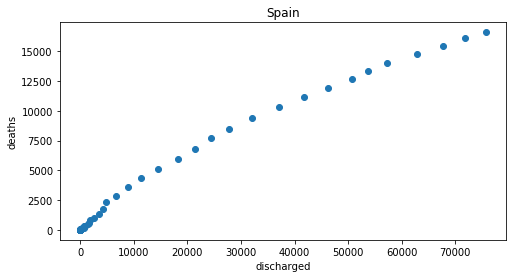

In [4]:
for c in ['Thailand','Indonesia','Singapore','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
